# Vorlesung 2

Gleitkomma Zahlen & Ungenauigkeiten

In [2]:
x=0.1+0.2
y=(x-0.3)*1e17
y

5.551115123125783

In [3]:
import math
import numpy as np

print(math.pi)
print(np.pi)

3.141592653589793
3.141592653589793


In [4]:
np.format_float_scientific(12*1e19, precision=15)

'1.2e+20'

In [5]:
eps = np.finfo(np.float64).eps
eps # Maschinengenauigkeit epsilon

2.220446049250313e-16

In [6]:
1+eps == 1

False

In [7]:
1+(eps/10) == 1

True

In [8]:
for i in range(10): # Exponentielle Zunahme von abständen von Zahlen -> Art wie Floats gespeichert sind
    print(f'{i}: {np.spacing(i)}')

0: 5e-324
1: 2.220446049250313e-16
2: 4.440892098500626e-16
3: 4.440892098500626e-16
4: 8.881784197001252e-16
5: 8.881784197001252e-16
6: 8.881784197001252e-16
7: 8.881784197001252e-16
8: 1.7763568394002505e-15
9: 1.7763568394002505e-15


In [9]:
np.finfo(np.float64) # Genauigkeiten anzeigen

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

In [10]:
np.finfo(np.float64).smallest_normal # Kleinste Natürliche Zahl

2.2250738585072014e-308

## Fehler

In [11]:
(1/3)**3-1/27

-6.938893903907228e-18

## Aufgaben 2.3

In [12]:
np.spacing(1024)

2.2737367544323206e-13

## Aufgaben 3.4

In [13]:
import numpy as np

n = int(input('Natürliche Zahl: '))
nstellen = int(np.floor(np.log10(n)) + 1)
quersum = 0

for i in range(nstellen):
    letztestelle = n % 10
    quersum += letztestelle
    n = (n - letztestelle) / 10

print(f'Die Quersumme ist: {quersum}')

Die Quersumme ist: 3.0


In [14]:
import numpy as np

n = int(input('Natürliche Zahl: '))
nstellen = int(np.floor(np.log10(n)) + 1)
quersum = 0

while n > 0:
    letztestelle = n % 10
    quersum += letztestelle
    n = (n - letztestelle) / 10

print(f'Die Quersumme ist: {quersum}')

Die Quersumme ist: 3.0


Text(0, 0.5, '%')

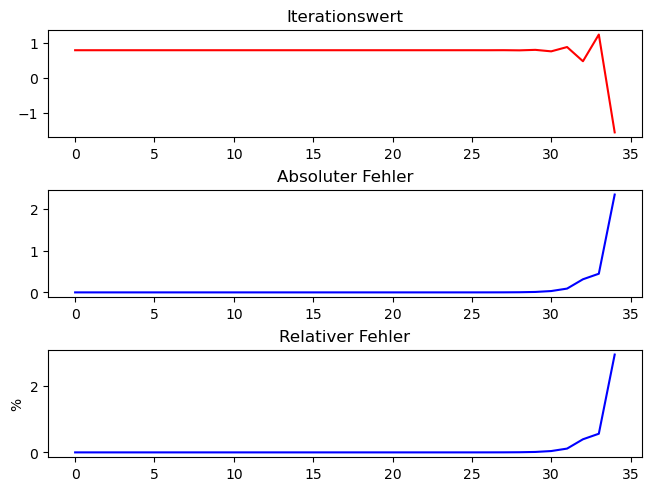

In [15]:
from matplotlib import pyplot as plt

wahr = 4/5
it = wahr * 5 * (1-wahr)
n = 35
versuch = [0]*n
wert = [0]*n
absfehler = [0]*n
relfehler = [0]*n

for i in range( n ):
    versuch[i] = i
    wert[i] = it
    absfehler[i] = abs(wahr-it)
    relfehler[i] = abs(wahr-it) / wahr
    it = it * 5 * (1- it)

fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].plot( versuch, wert, color="red" )
axs[0].set_title( "Iterationswert" )
axs[1].plot( versuch, absfehler, color="blue" )
axs[1].set_title( "Absoluter Fehler" )
axs[2].plot( versuch, relfehler, color="blue" )
axs[2].set_title( "Relativer Fehler" )
axs[2].set_ylabel( "%" )

## Aufgaben 4

Beispiel Problem

In [16]:
def funktion(x):
    return x**2 * np.sin(x)

def ableitung(x):
    return 2*x * np.sin(x) + x**2 * np.cos(x)

def stammfunktion(x):
    return-x**2 * np.cos(x) + 2 * x * np.sin(x) + 2 * np.cos(x)

def trapezregel(a, b, h):
    x = np.arange(a, b+h, h)
    y = funktion(x)
    return h/2 * (y[0] + 2*np.sum(y[1:-1]) + y[-1])

In [17]:
trapezregel(0,7,0.5)

-27.268588030978595

Text(0.5, 1.0, 'Stammfunktion')

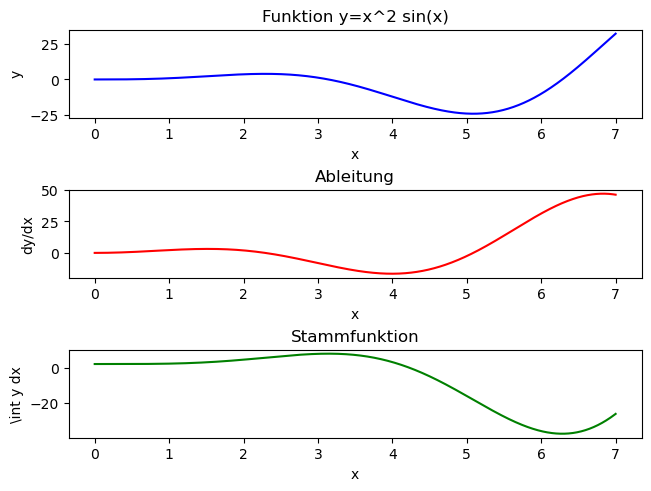

In [18]:
# Plot 1: definiere Intervall und werte Funktion, Ableitung, Stammfkt aus
a=0
b=7
x = np.linspace(a,b,1000)
y = funktion(x)
ystrich = ableitung(x)
ystammfkt = stammfunktion(x)
# Visualisiere die drei Auswertungen untereinander
# Plotte die Funktion
fig, axs = plt.subplots(3, 1, constrained_layout=True)
axs[0].plot( x, y, color="blue" )
axs[0].set_xlabel( "x" )
axs[0].set_ylabel( "y" )
axs[0].set_title( "Funktion y=x^2 sin(x)" )

# Plotte die Ableitung
axs[1].plot( x, ystrich, color="red" )
axs[1].set_xlabel( "x" )
axs[1].set_ylabel( "dy/dx" )
axs[1].set_title( "Ableitung" )

# Plotte die Stammfunktion, (Integrationskonstante := 0)
axs[2].plot( x, ystammfkt, color="green" )
axs[2].set_xlabel( "x" )
axs[2].set_ylabel( "\int y dx" )
axs[2].set_title( "Stammfunktion" )

Wert des bestimmten Integrals = -28.235593572072272
h= 0.5
h= 0.1
h= 0.05
h= 0.01
h= 0.005
h= 0.001
h= 0.0005
h= 0.0001
h= 5e-05
h= 1e-05
h= 5e-06
h= 1e-06
h= 5e-07
h= 1e-07
h= 1e-08


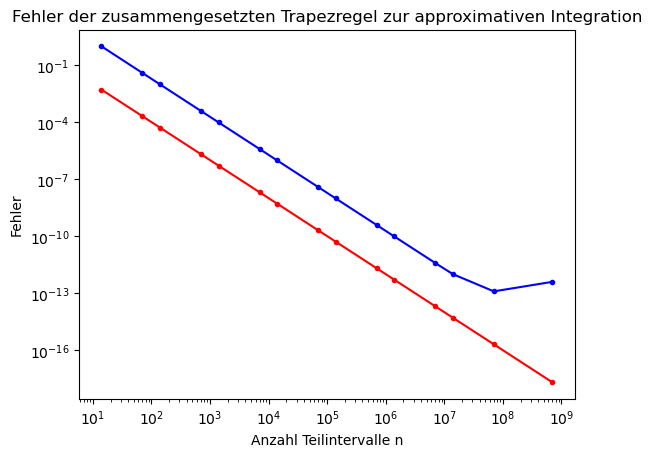

In [20]:
# exakte und approximative Berechnung eines bestimmten Integrals
intexakt = stammfunktion(b) - stammfunktion(a)
print( 'Wert des bestimmten Integrals =', intexakt )

h = np.array([5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4, 1e-4, 5e-5,
              1e-5, 5e-6, 1e-6, 5e-7, 1e-7, 1e-8])
m = len(h)
ns = (b - a) / h
fehler =[0]*m
for i in range(m):
    print("h=",h[i])
    inttrapezapprox = trapezregel(a, b, h[i])
    fehler[i] = abs( intexakt-inttrapezapprox )

plt.figure(4)
#Doppelt-logarithmische Skala
plt.title('Fehler der zusammengesetzten Trapezregel zur approximativen Integration')
plt.xlabel('Anzahl Teilintervalle n')
plt.ylabel('Fehler')
plt.loglog( ns, fehler, color='blue', marker = '.' )
plt.loglog( ns, ns**(-2), color='red', marker = '.' )
plt.show()